In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# File path
FILE_PATH="Blinkit Data.xlsx"
SHEET_NAME="Sheet1"

In [5]:
# Load data
df=pd.read_excel(FILE_PATH,sheet_name=SHEET_NAME)

In [6]:
# Preview
print("Shape:",df.shape)
display(df.head())

Shape: (8523, 12)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [7]:
# Load Data
df=pd.read_excel(FILE_PATH,sheet_name=SHEET_NAME)
display(df.head())
print('Shape:',df.shape)
print('Columns:',df.columns.tolist())
df.dtypes

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


Shape: (8523, 12)
Columns: ['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']


Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [8]:
# Basic Summaries
# Missing values per column
print("Missing values:")
print(df.isna().sum())


Missing values:
Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [9]:
# Summary of numeric columns
print("\nNumeric Summary:")
print(df.describe().T)



Numeric Summary:
                            count         mean        std       min  \
Outlet Establishment Year  8523.0  2016.450546   3.189396  2011.000   
Item Visibility            8523.0     0.066132   0.051598     0.000   
Item Weight                7060.0    12.857645   4.643456     4.555   
Sales                      8523.0   140.992783  62.275067    31.290   
Rating                     8523.0     3.965857   0.605651     1.000   

                                   25%          50%          75%          max  
Outlet Establishment Year  2014.000000  2016.000000  2018.000000  2022.000000  
Item Visibility               0.026989     0.053931     0.094585     0.328391  
Item Weight                   8.773750    12.600000    16.850000    21.350000  
Sales                        93.826500   143.012800   185.643700   266.888400  
Rating                        4.000000     4.000000     4.200000     5.000000  


In [10]:
# Summary of categorial columns
print("\ncategorial Summary:")
print(df.describe(include=["object"]).T)


categorial Summary:
                     count unique                    top  freq
Item Fat Content      8523      5                Low Fat  5089
Item Identifier       8523   1559                  FDW13    10
Item Type             8523     16  Fruits and Vegetables  1232
Outlet Identifier     8523     10                 OUT027   935
Outlet Location Type  8523      3                 Tier 3  3350
Outlet Size           8523      3                 Medium  3631
Outlet Type           8523      4      Supermarket Type1  5577


In [11]:
# Data Cleaning
df_clean=df.copy()
# (a) Normalize 'Item fat Content'
if "Item Fat Content" in df_clean.columns:
    df_clean["Item Fat Content"]=df_clean["Item Fat Content"].replace(
        {"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}
    )


In [12]:
# (b) impute Missing 'Item Weight' with median
if "Item Weight" in df_clean.columns:
    df_clean["Item Weight"]=df_clean["Item Weight"].fillna(df_clean["Item Weight"].median())

In [13]:
# (c) Clip extreme 'Item Visibility' values at 99th percentile
if "Item Visibility" in df_clean.columns:
    upper=df_clean["Item Visibility"].quantile(0.99)
    df_clean["Item Visibility"]=df_clean["Item Visibility"].clip(upper=upper)
    

In [14]:
# (d) Add 'Years Since Establishment'
if "Outlet Establishment Year" in df_clean.columns:
    df_clean["Years Since Establishment"]=2025 - df_clean["Outlet Establishment Year"]

In [15]:
# Preview cleaned data
df_clean.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Years Since Establishment
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,13
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,3
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,9
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,11
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,10


In [16]:
# Separate numeric and categorial columns
numeric_cols=df_clean.select_dtypes(include=[np.number]).columns
categorical_cols=df_clean.select_dtypes(include=["object"]).columns


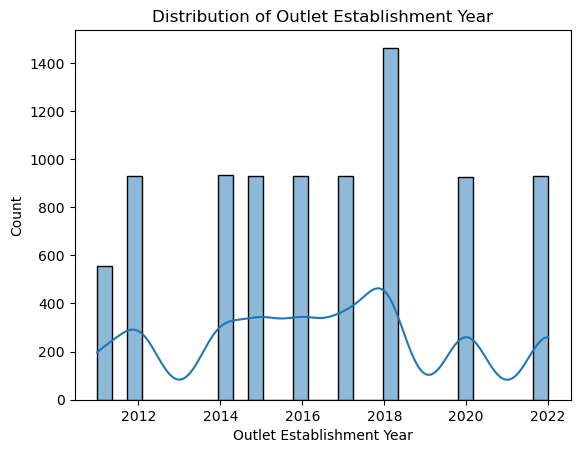

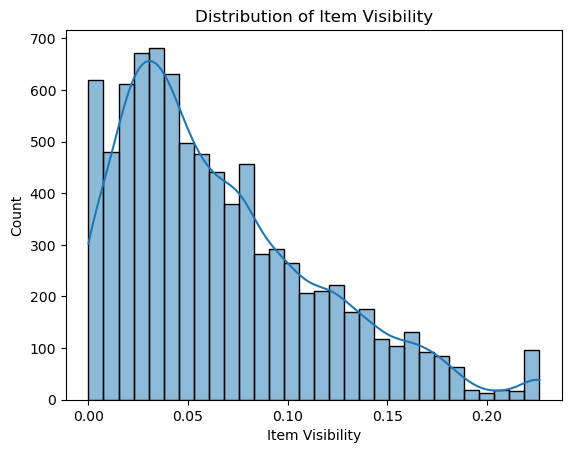

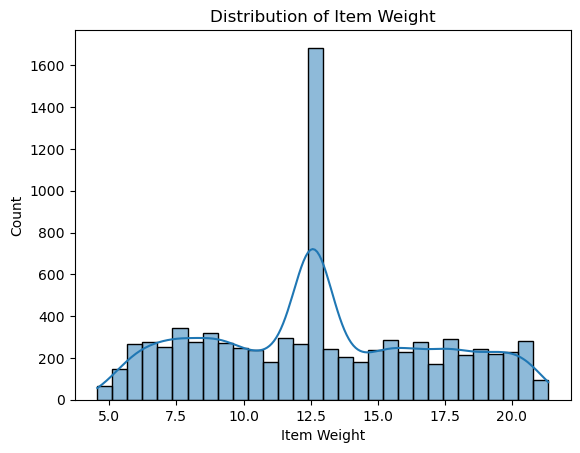

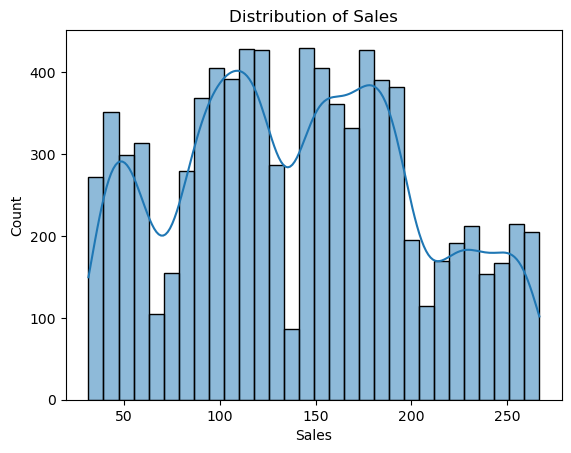

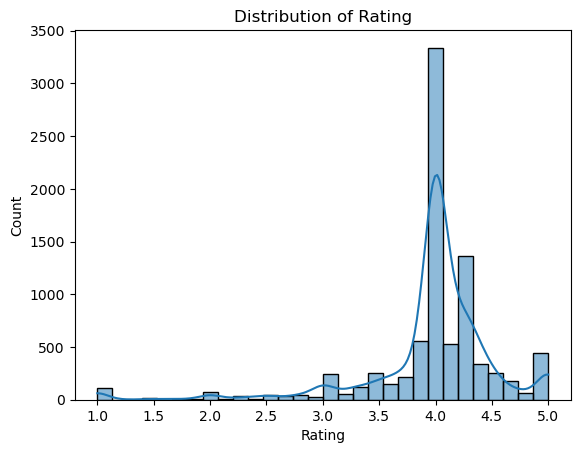

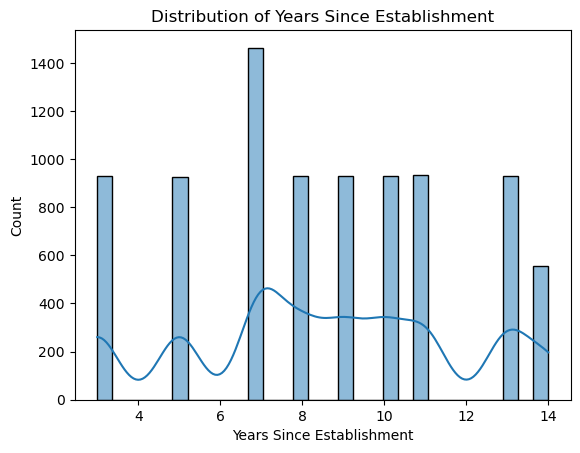

In [17]:
# Histogram for numeric variables
for col in numeric_cols:
    plt.figure()
    sns.histplot(df_clean[col],kde=True,bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

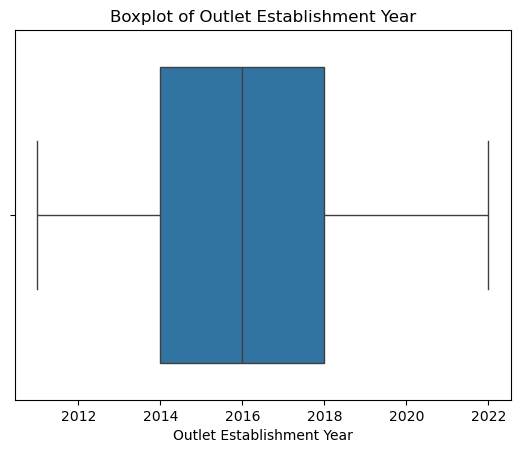

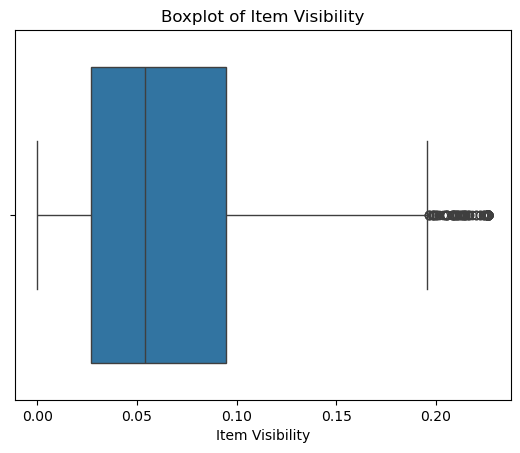

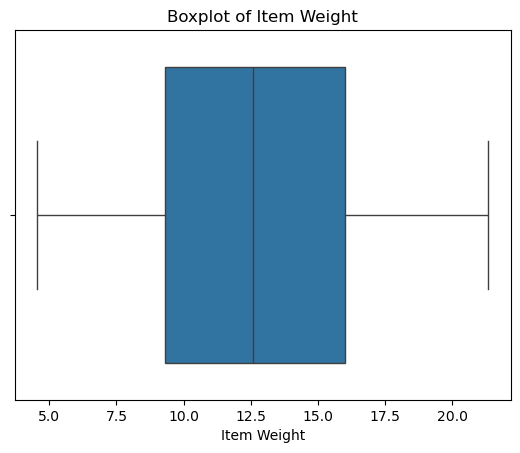

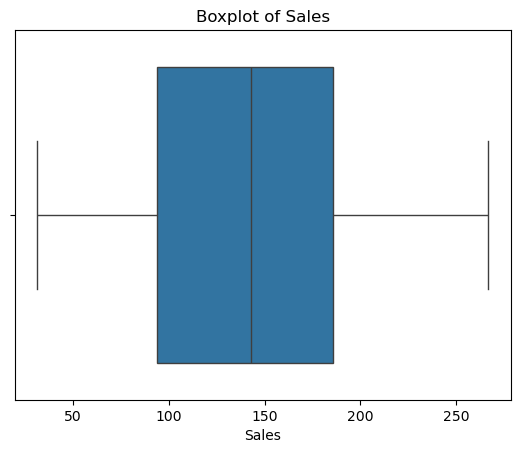

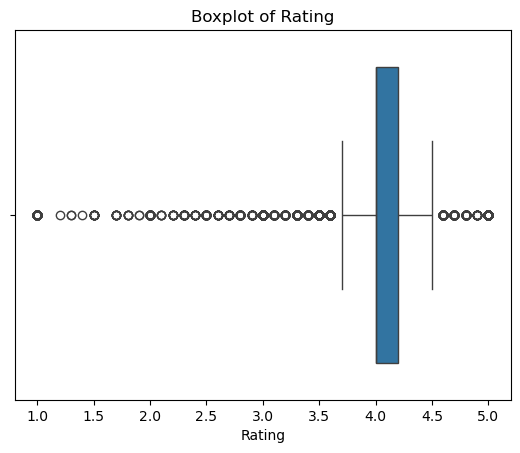

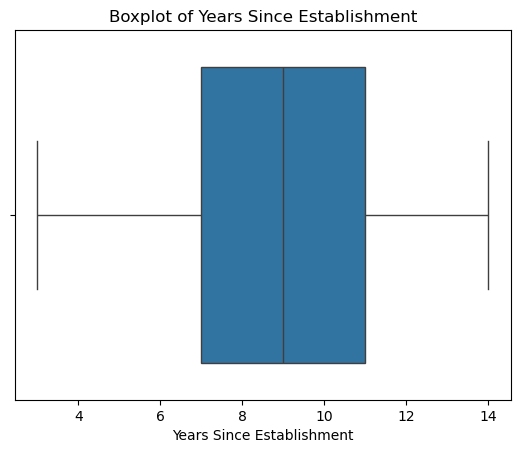

In [18]:
# Boxplots for numeric variables
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df_clean[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

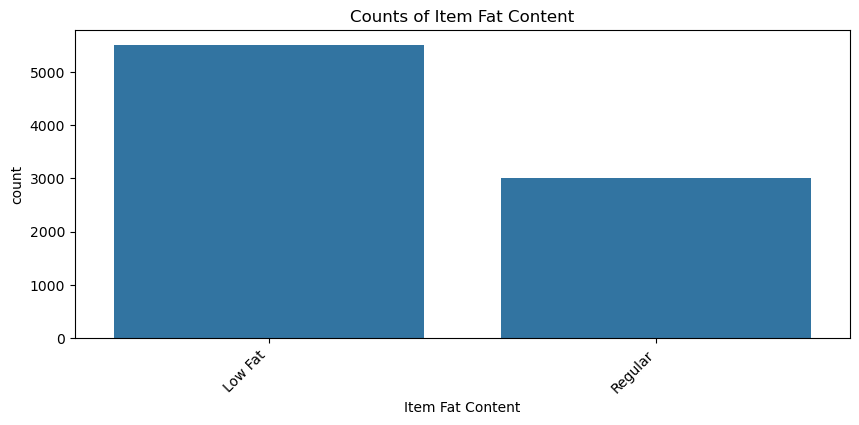

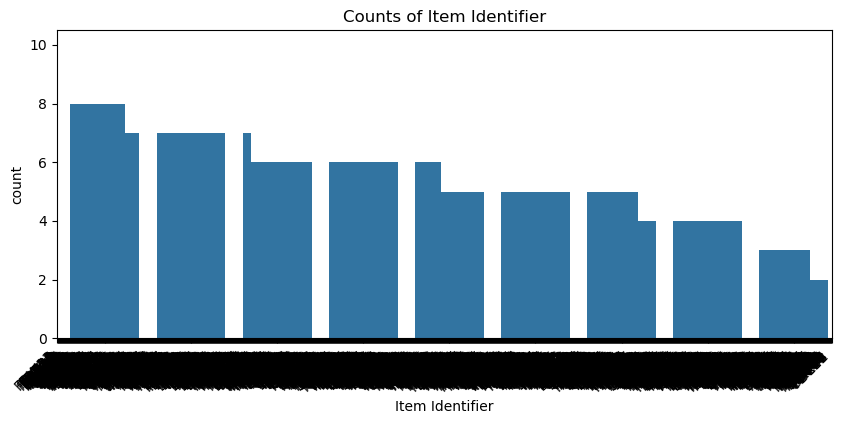

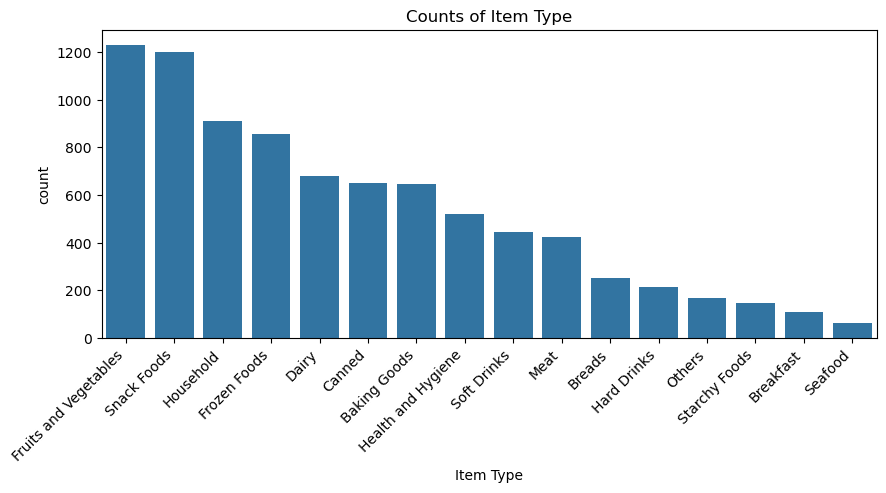

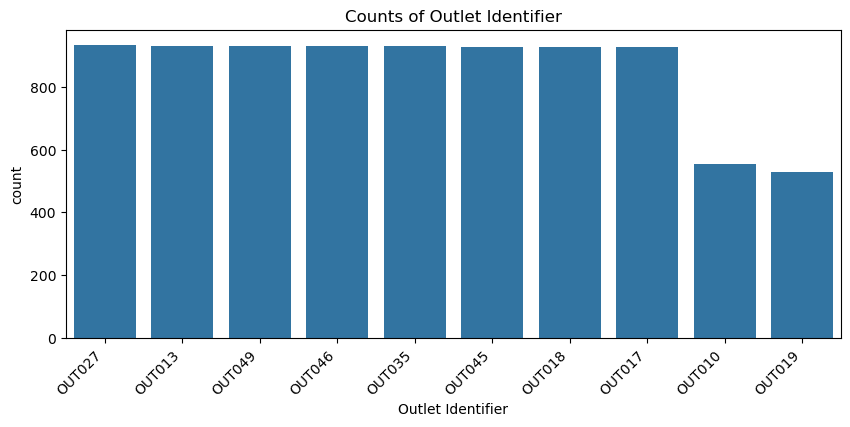

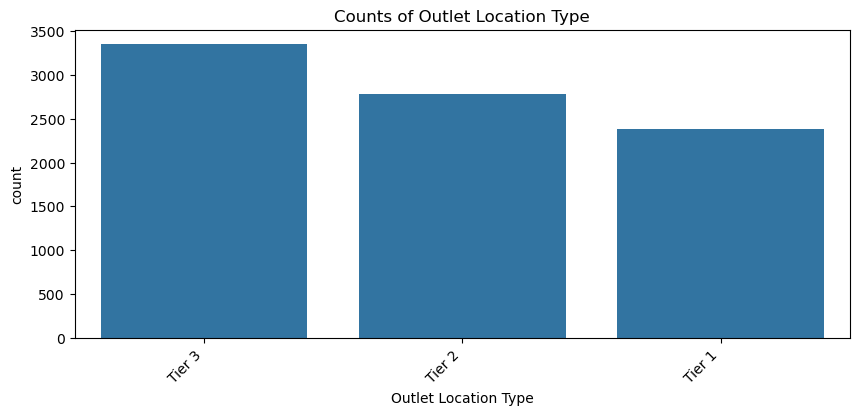

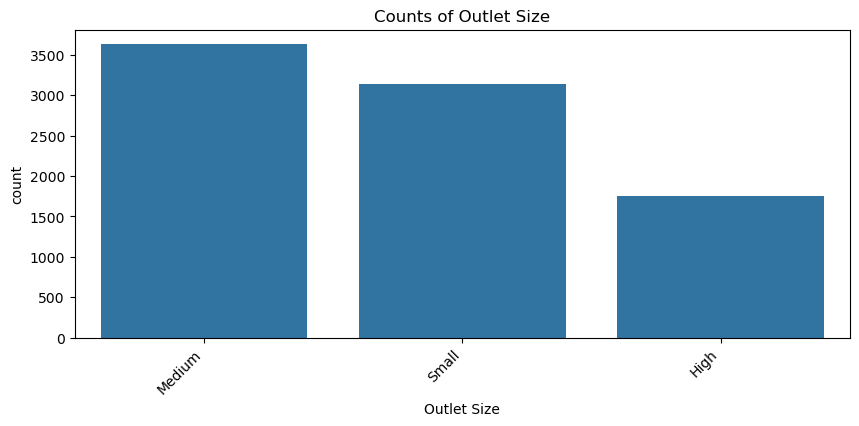

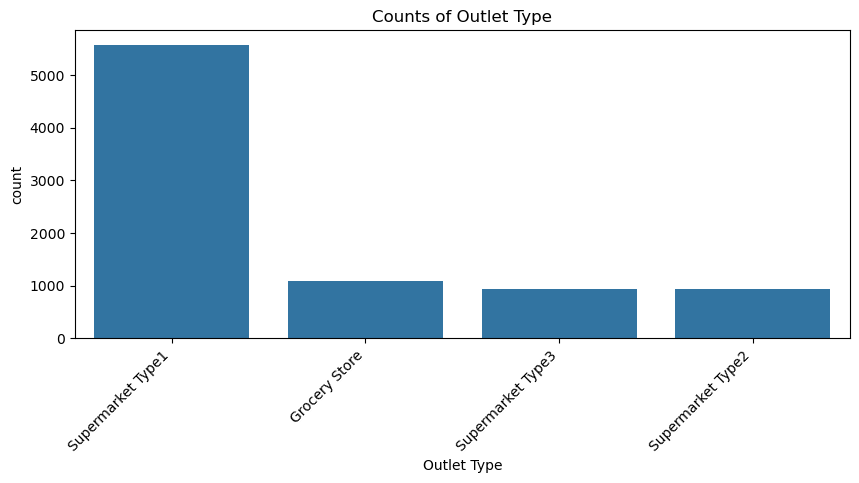

In [19]:
# Countplot for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df_clean,x=col,order=df_clean[col].value_counts().index)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45,ha="right")
    plt.show()

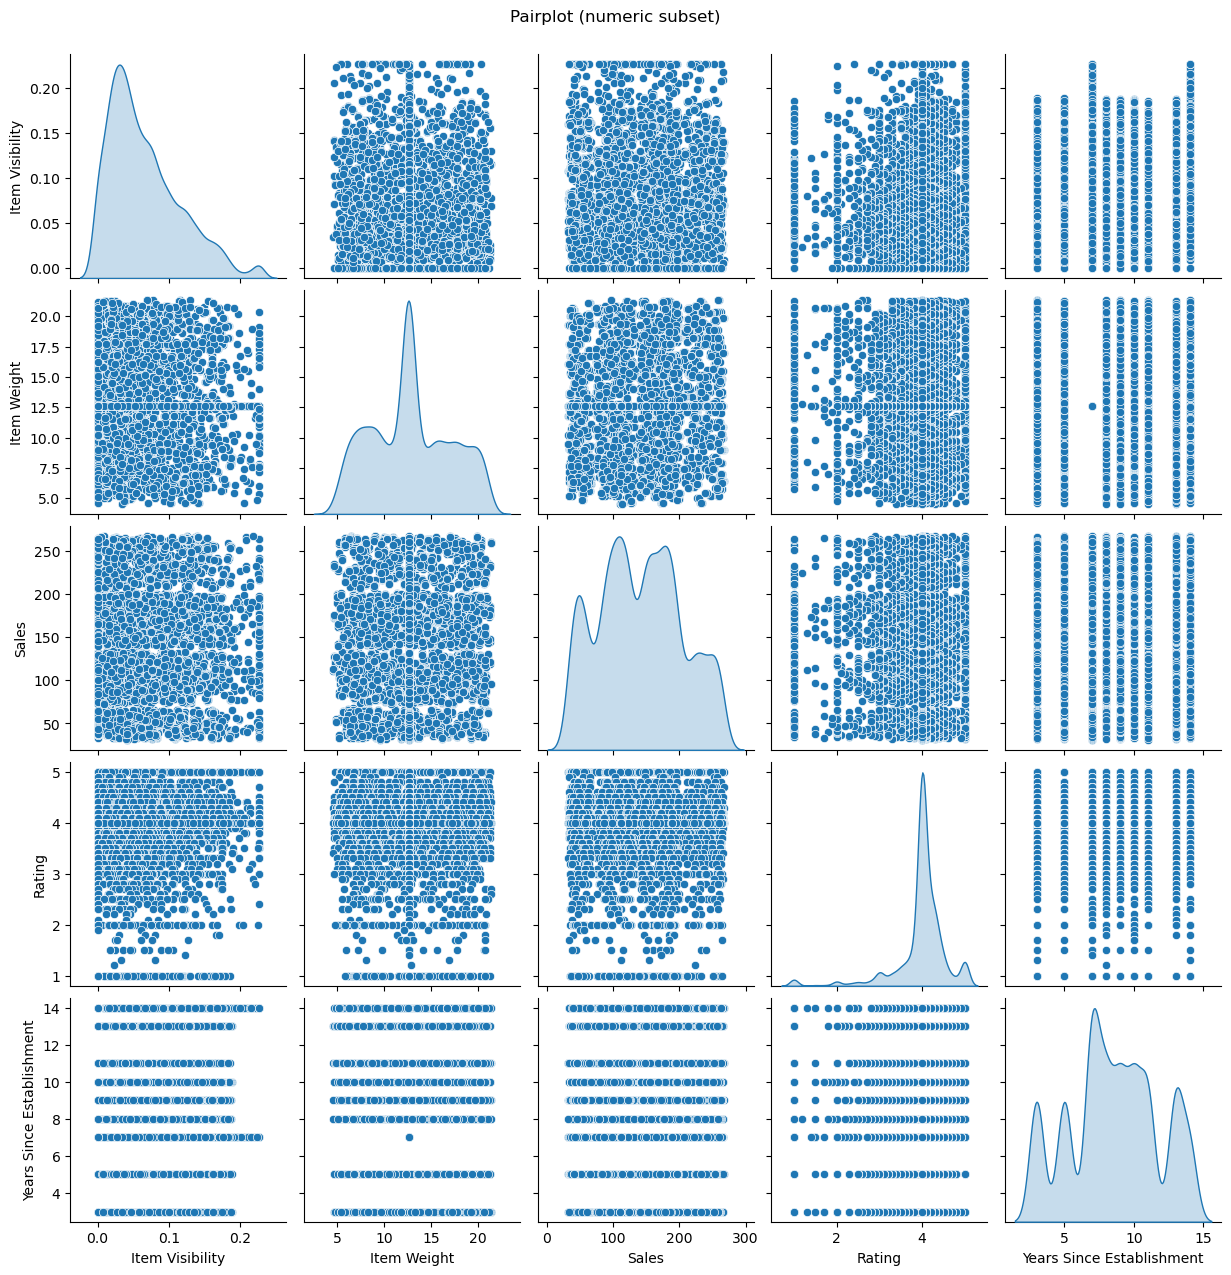

In [20]:
# Bivariate Analysis
target="Sales" if "Sales" in df_clean.columns else None

# Pairplot (subset to keep it readable)
subset=[c for c in numeric_cols if c != "Outlet Establishment Year"]
subset=subset[:6]
if len(subset)>=2:
    g=sns.pairplot(df_clean[subset],diag_kind="kde")
    g.fig.suptitle("Pairplot (numeric subset)",y=1.02)
    plt.show()

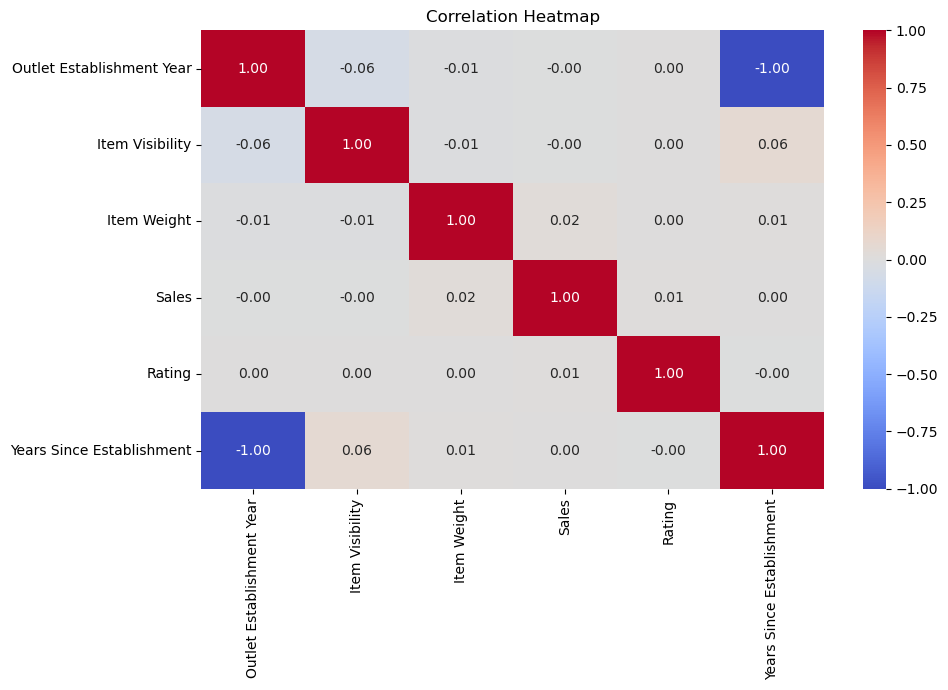

In [21]:
# Correlation heatmap
corr=df_clean.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

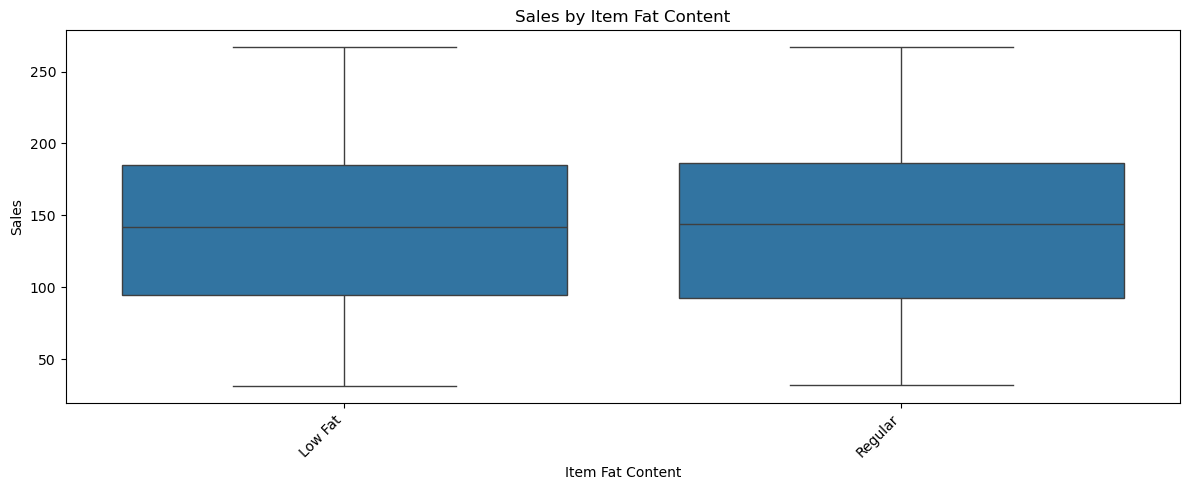

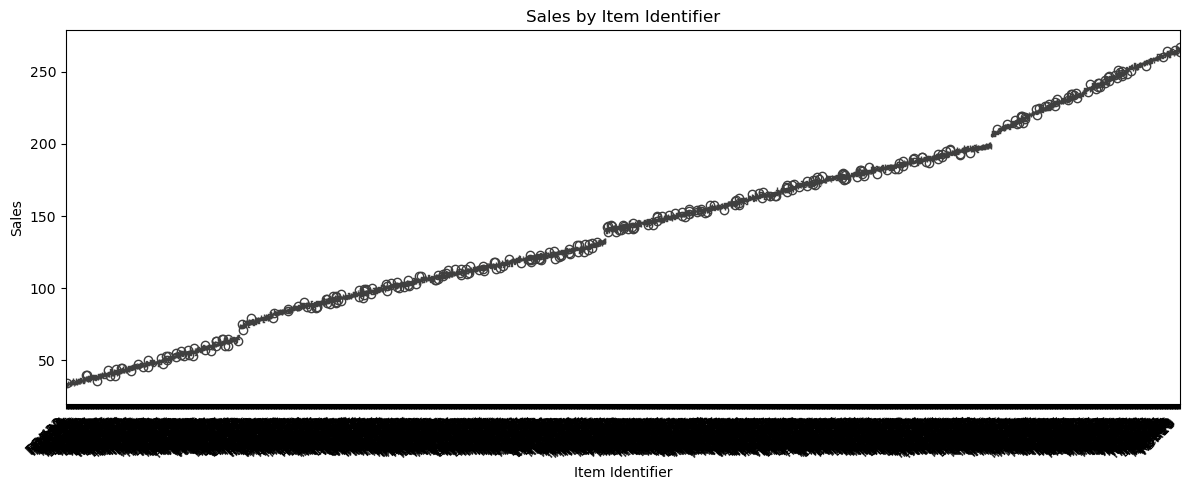

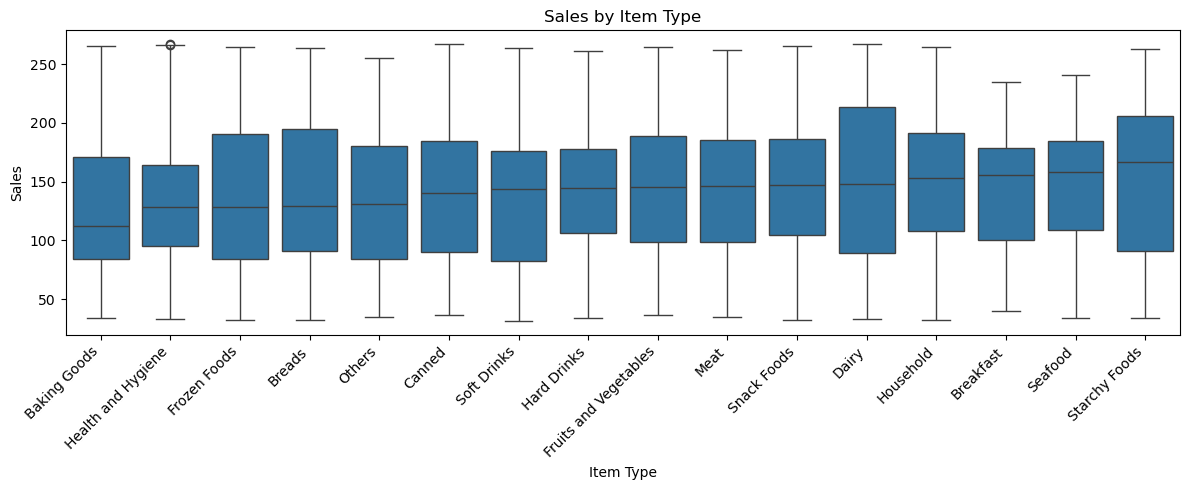

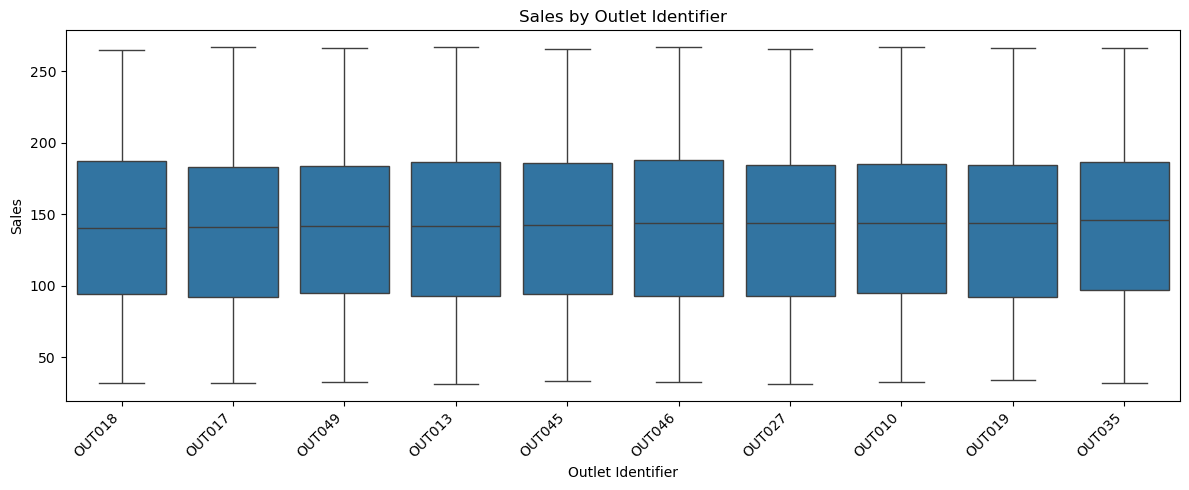

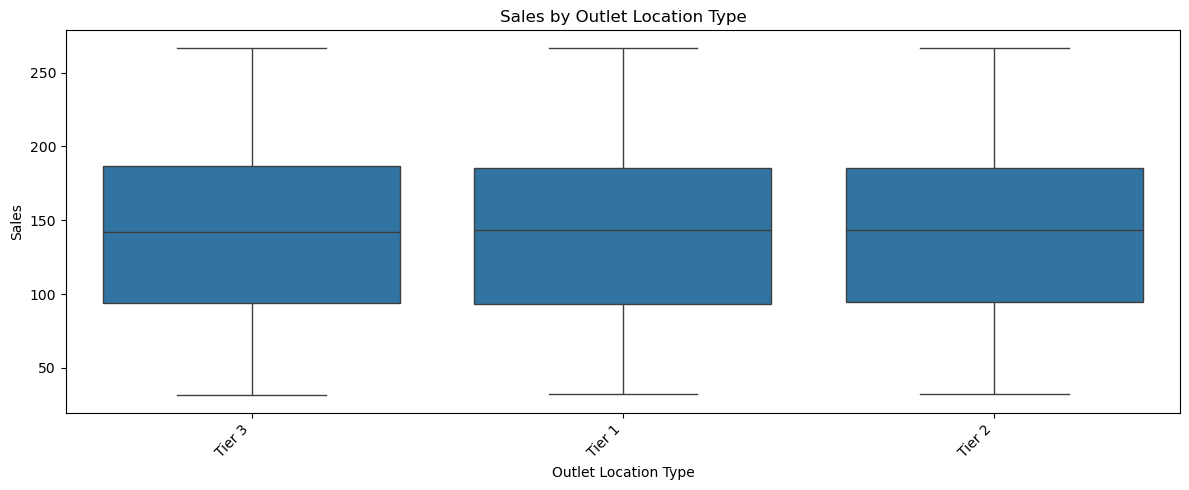

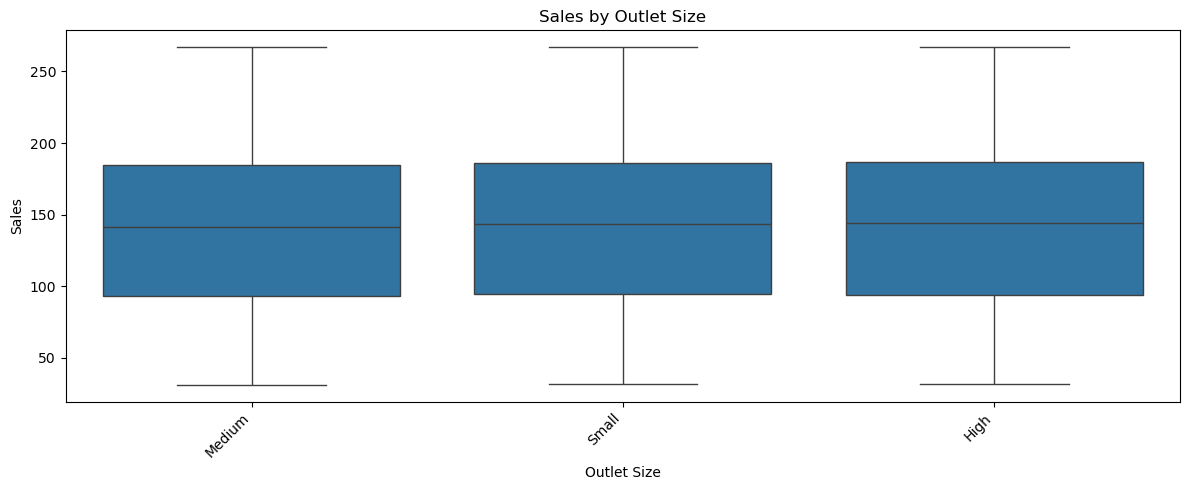

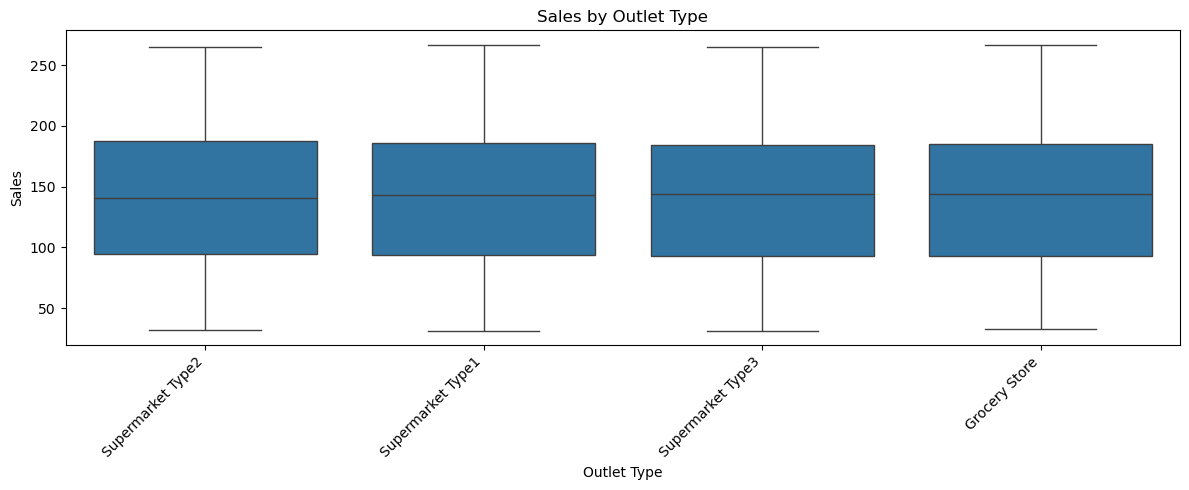

In [22]:
# Boxplots:Sales vs categorical
if target:
    for col in categorical_cols:
        plt.figure(figsize=(12,5))
        order = df_clean.groupby(col)[target].median().sort_values().index
        sns.boxplot(data=df_clean, x=col, y=target, order=order)
        plt.title(f"{target} by {col}")
        plt.xticks(rotation=45 , ha="right")
        plt.tight_layout()
        plt.show()

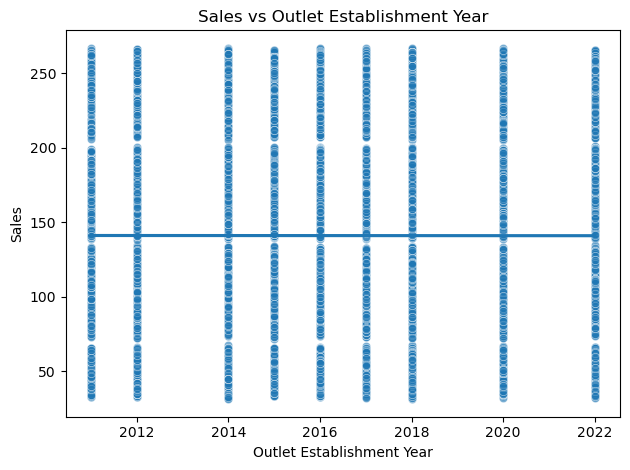

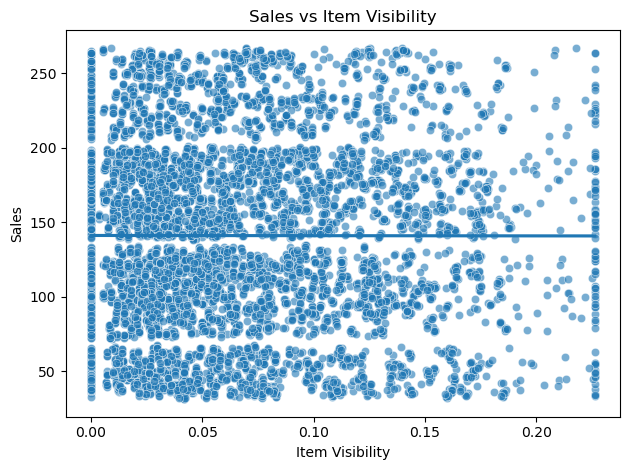

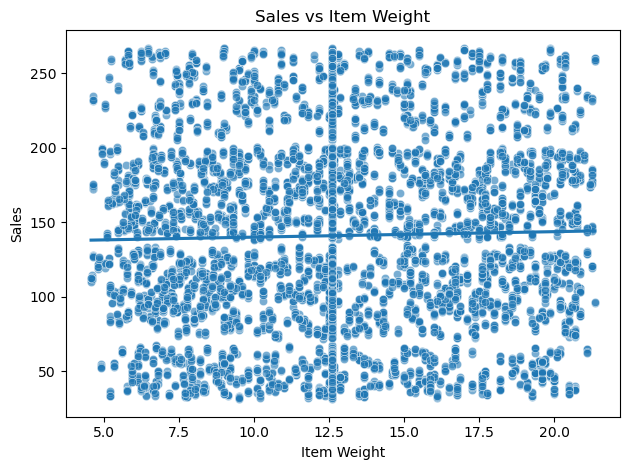

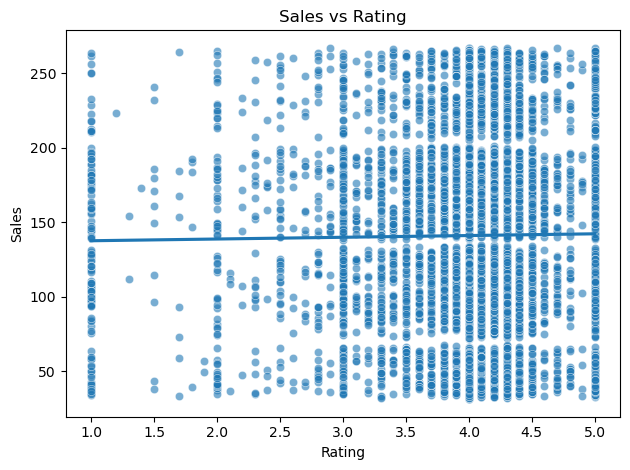

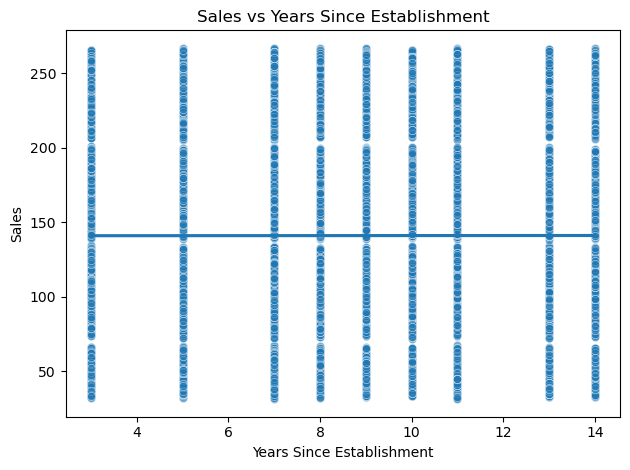

In [23]:
# Scatter/regression:Sales vs numeric
if target:
    for col in numeric_cols:
        if col == target:
            continue
        plt.figure()
        sns.scatterplot(data=df_clean, x=col, y=target, alpha=0.6)
        sns.regplot(data=df_clean, x=col, y=target,scatter=False,ci=None)
        plt.title(f"{target} vs {col}")
        plt.tight_layout()
        plt.show()